In [2]:
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

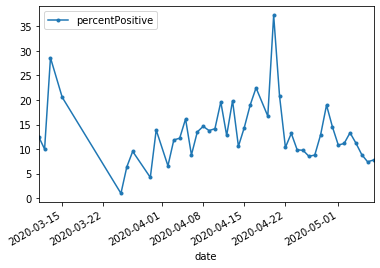

In [8]:
import requests,json
import pandas as pd

result = requests.get("https://covidtracking.com/api/states/daily")
data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']=='OH'])

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df_percent = df[['date','percentPositive']][ notNullorOneorZero & notTooBig ] 

df_percent['date'] = pd.to_datetime(df_percent['date'],format='%Y%m%d')
df_percent['percentPositive'] = df_percent['percentPositive'].abs()*100

a1 = df_percent.set_index('date').plot(marker='.')
a1.figure.savefig('percent',dpi=100)

In [10]:
df.set_index('date').head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,percentPositive
date,,,,,,,,,,,,,,,,,,,,,
20200507,OH,22131,153928,NaN,1057.0,4140.0,418.0,1167.0,279.0,NaN,...,176059,176059,176059,39,46.0,88.0,6575.0,555.0,7130.0,0.077840
20200506,OH,21576,147353,NaN,1045.0,4052.0,407.0,1151.0,275.0,NaN,...,168929,168929,168929,39,90.0,96.0,7587.0,607.0,8194.0,0.074079
20200505,OH,20969,139766,NaN,1069.0,3956.0,402.0,1123.0,281.0,NaN,...,160735,160735,160735,39,79.0,147.0,5085.0,495.0,5580.0,0.088710
20200504,OH,20474,134681,NaN,1078.0,3809.0,412.0,1090.0,275.0,NaN,...,155155,155155,155155,39,18.0,40.0,4429.0,560.0,4989.0,0.112247
20200503,OH,19914,130252,NaN,931.0,3769.0,393.0,1078.0,255.0,NaN,...,150166,150166,150166,39,17.0,57.0,3768.0,579.0,4347.0,0.133195
